## **Importing Libraries**

In [969]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,roc_auc_score,recall_score,roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,r2_score
from sklearn.model_selection import train_test_split
from  sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



## **Loading Dataset**

In [970]:
park=pd.read_csv("/content/parkinsons.csv")
park

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


## **EDA**

In [971]:
#renaming variables for simpler observing
park.rename(columns=({'MDVP:Fo(Hz)':'avg_freq', 'MDVP:Fhi(Hz)':'max_freq', 'MDVP:Flo(Hz)':'min_freq', 'MDVP:Jitter(%)':'var_freq1',
       'MDVP:Jitter(Abs)':'var_freq2', 'MDVP:RAP':'var_freq3', 'MDVP:PPQ':'var_freq4', 'Jitter:DDP':'var_freq5',
       'MDVP:Shimmer':'var_amp1', 'MDVP:Shimmer(dB)':'var_amp2', 'Shimmer:APQ3':'var_amp3', 'Shimmer:APQ5':'var_amp4',
       'MDVP:APQ':'var_amp5', 'Shimmer:DDA':'var_amp6'}),inplace=True)

In [972]:
park.head()

,name,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [973]:
park.shape

(195, 24)

In [974]:
park.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_freq,195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
max_freq,195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
min_freq,195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
var_freq1,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
var_freq2,195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
var_freq3,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
var_freq4,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
var_freq5,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
var_amp1,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
var_amp2,195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [975]:
park.columns

Index(['name', 'avg_freq', 'max_freq', 'min_freq', 'var_freq1', 'var_freq2',
       'var_freq3', 'var_freq4', 'var_freq5', 'var_amp1', 'var_amp2',
       'var_amp3', 'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'HNR', 'status',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [976]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       195 non-null    object 
 1   avg_freq   195 non-null    float64
 2   max_freq   195 non-null    float64
 3   min_freq   195 non-null    float64
 4   var_freq1  195 non-null    float64
 5   var_freq2  195 non-null    float64
 6   var_freq3  195 non-null    float64
 7   var_freq4  195 non-null    float64
 8   var_freq5  195 non-null    float64
 9   var_amp1   195 non-null    float64
 10  var_amp2   195 non-null    float64
 11  var_amp3   195 non-null    float64
 12  var_amp4   195 non-null    float64
 13  var_amp5   195 non-null    float64
 14  var_amp6   195 non-null    float64
 15  NHR        195 non-null    float64
 16  HNR        195 non-null    float64
 17  status     195 non-null    int64  
 18  RPDE       195 non-null    float64
 19  DFA        195 non-null    float64
 20  spread1   

In [977]:
park.isnull().sum()

name         0
avg_freq     0
max_freq     0
min_freq     0
var_freq1    0
var_freq2    0
var_freq3    0
var_freq4    0
var_freq5    0
var_amp1     0
var_amp2     0
var_amp3     0
var_amp4     0
var_amp5     0
var_amp6     0
NHR          0
HNR          0
status       0
RPDE         0
DFA          0
spread1      0
spread2      0
D2           0
PPE          0
dtype: int64

In [978]:
park.name.nunique()

195

In [979]:
park.drop(columns="name",axis=1,inplace=True)
park

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [980]:
park.status.unique()

array([1, 0])

In [982]:
#re-ordering the columns
col_names = ['avg_freq',
 'max_freq',
 'min_freq',
 'var_freq1',
 'var_freq2',
 'var_freq3',
 'var_freq4',
 'var_freq5',
 'var_amp1',
 'var_amp2',
 'var_amp3',
 'var_amp4',
 'var_amp5',
 'var_amp6',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE',
 'status']
park = park.reindex(columns=col_names)
park

,avg_freq,max_freq,min_freq,var_freq1,var_freq2,var_freq3,var_freq4,var_freq5,var_amp1,var_amp2,...,var_amp6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


## **Data Visualization**


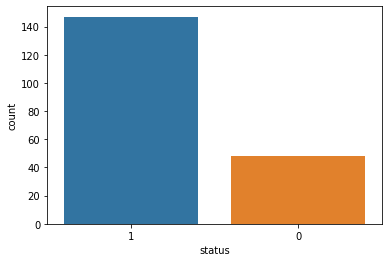

In [983]:
#Visualizing the target column "status"
sns.countplot(x = 'status',
              data = park,
              order = park['status'].value_counts().index)

In [984]:
park["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

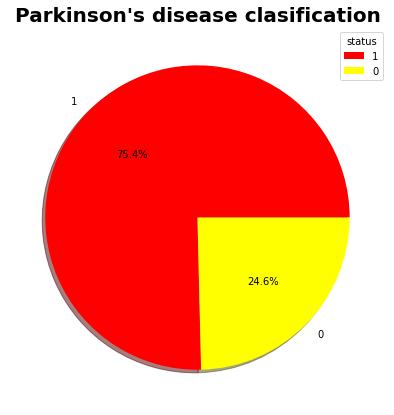

In [985]:
fig=plt.figure(figsize=(7,7))
colors=("red","yellow")
tags=park["status"].value_counts()
tags.plot(kind='pie',autopct="%0.1f%%",label='',colors=colors,shadow=True)
plt.legend(title="status")
plt.title("Parkinson's disease clasification",fontsize='20',fontweight='bold')
plt.show()

In [986]:
def dist_plot(park):
    grid_size = (10,4)
    fig_size = (12, 20)
    fig = plt.figure(figsize = fig_size)
    column_names = park.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        plot = sns.histplot(park[column_name], kde = True, color = 'Green')
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

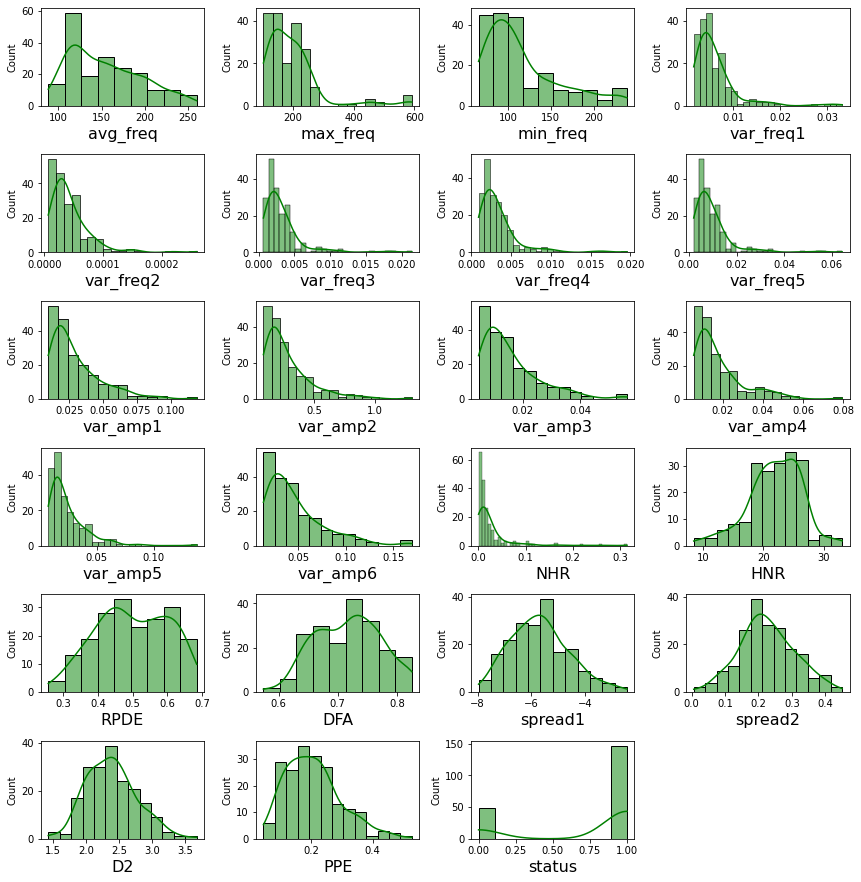

In [987]:
dist_plot(park)

In [988]:
def cor_matrix(park):
    corr=park.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corr,annot=True,cmap='OrRd')
    plt.show()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
    print('Columns that have high correlation and should be dropped excluding one of them:',to_drop)
    return corr

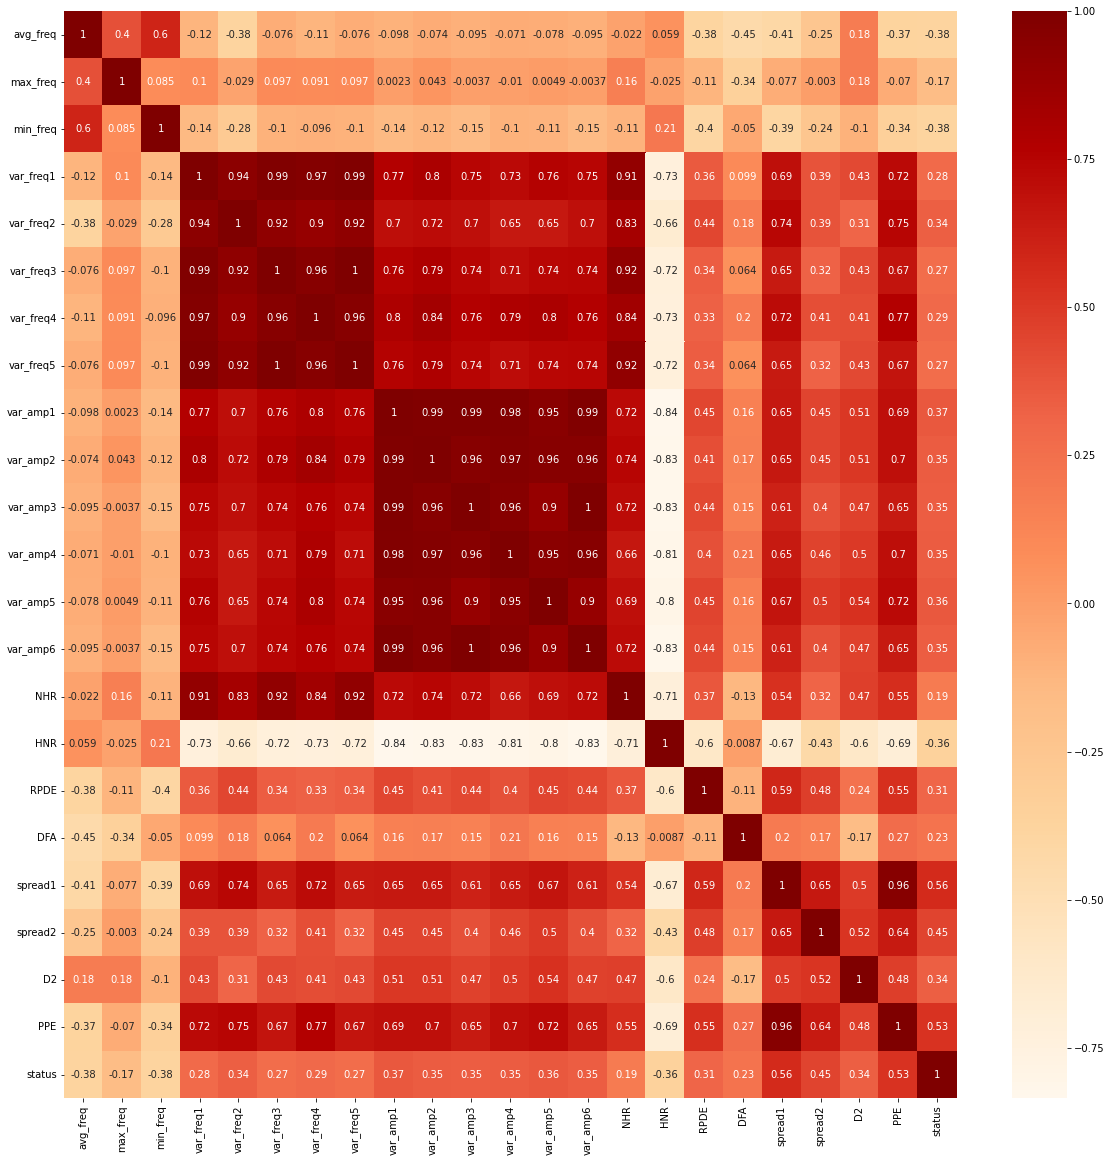

Columns that have high correlation and should be dropped excluding one of them: ['var_freq2', 'var_freq3', 'var_freq4', 'var_freq5', 'var_amp2', 'var_amp3', 'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'PPE']


<ipython-input-988-92ab7766a3d8>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [989]:
w = cor_matrix(park)

In [990]:
#printing features most correlated to the target column
status_corr = w.sort_values(by='status', ascending = False).iloc[:,-1]
status_corr

status       1.000000
spread1      0.564838
PPE          0.531039
spread2      0.454842
var_amp1     0.367430
var_amp5     0.364316
var_amp4     0.351148
var_amp2     0.350697
var_amp3     0.347617
var_amp6     0.347608
D2           0.340232
var_freq2    0.338653
RPDE         0.308567
var_freq4    0.288698
var_freq1    0.278220
var_freq3    0.266668
var_freq5    0.266646
DFA          0.231739
NHR          0.189429
max_freq    -0.166136
HNR         -0.361515
min_freq    -0.380200
avg_freq    -0.383535
Name: status, dtype: float64

In [991]:
#dropping the highly correlated columns except one
columns_names = ['var_freq2', 'var_freq3', 'var_freq4', 'var_freq5', 'var_amp2', 'var_amp3', 'var_amp4', 'var_amp5', 'var_amp6', 'NHR', 'PPE']
park.drop(columns=columns_names,axis=1,inplace=True)
park

,avg_freq,max_freq,min_freq,var_freq1,var_amp1,HNR,RPDE,DFA,spread1,spread2,D2,status
0,119.992,157.302,74.997,0.00784,0.04374,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,1
1,122.400,148.650,113.819,0.00968,0.06134,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,1
2,116.682,131.111,111.555,0.01050,0.05233,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,1
3,116.676,137.871,111.366,0.00997,0.05492,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,1
4,116.014,141.781,110.655,0.01284,0.06425,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,1
...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.04087,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0
191,209.516,253.017,89.488,0.00564,0.02751,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0
192,174.688,240.005,74.287,0.01360,0.02308,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0
193,198.764,396.961,74.904,0.00740,0.02296,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0


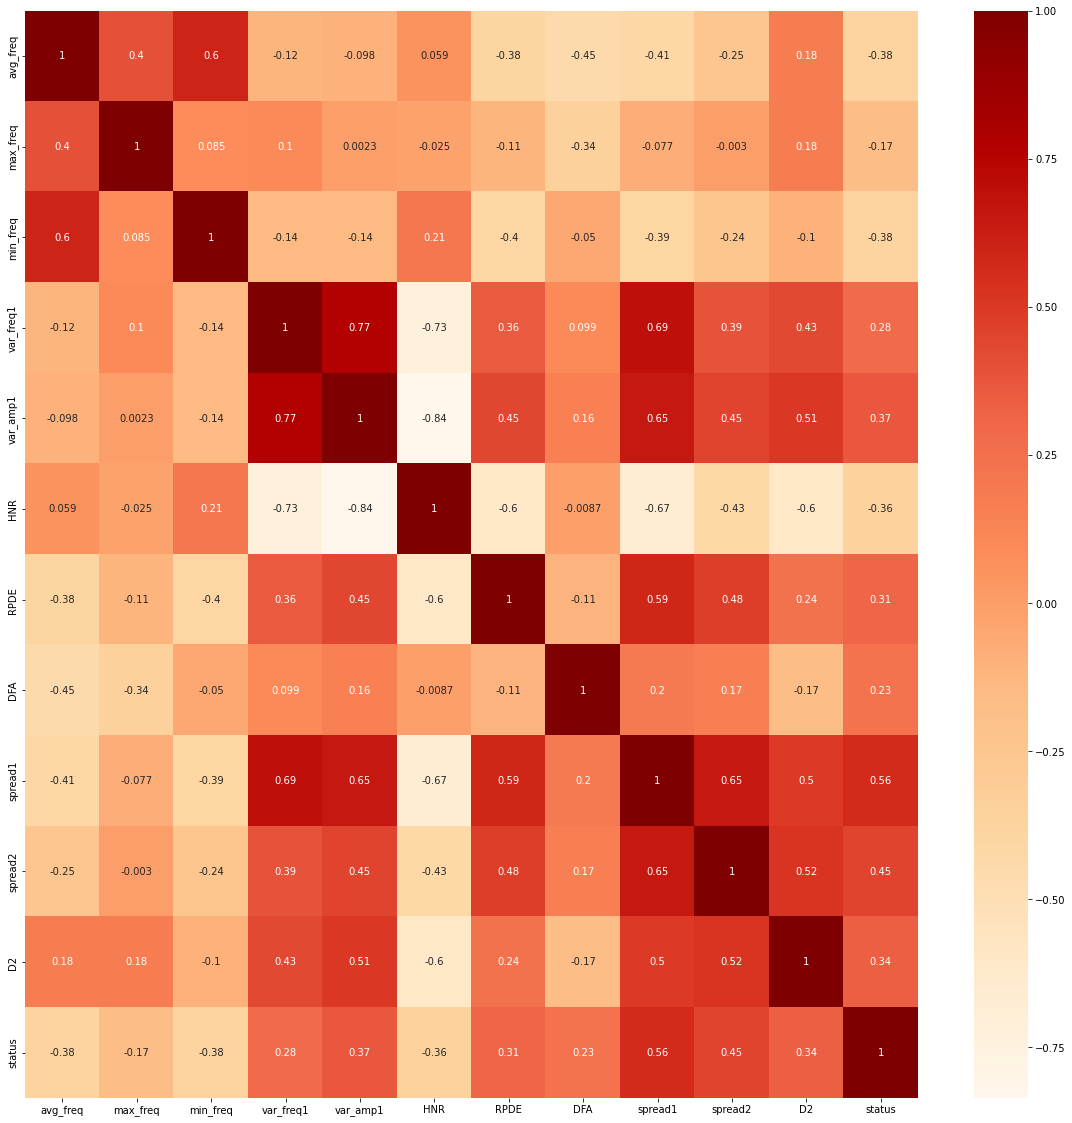

Columns that have high correlation and should be dropped excluding one of them: []


<ipython-input-988-92ab7766a3d8>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [992]:
#ploting correlation matrix after deleting correlated columns
tmp = cor_matrix(park)

In [993]:
status_corr = tmp.sort_values(by='status', ascending = False).iloc[:,-1]
status_corr

status       1.000000
spread1      0.564838
spread2      0.454842
var_amp1     0.367430
D2           0.340232
RPDE         0.308567
var_freq1    0.278220
DFA          0.231739
max_freq    -0.166136
HNR         -0.361515
min_freq    -0.380200
avg_freq    -0.383535
Name: status, dtype: float64

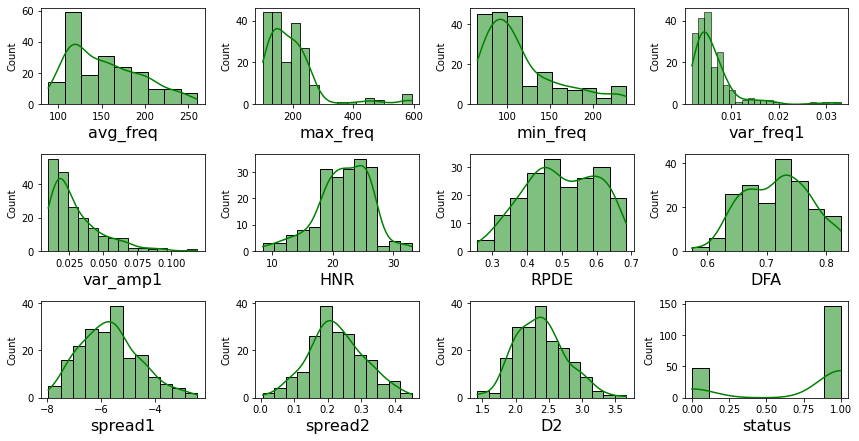

In [994]:
dist_plot(park)


## **Outlier Detection Using Box Plot**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


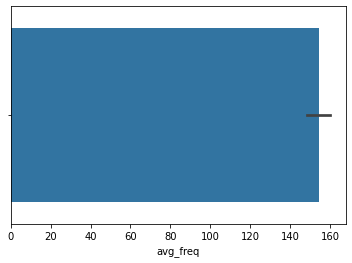

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


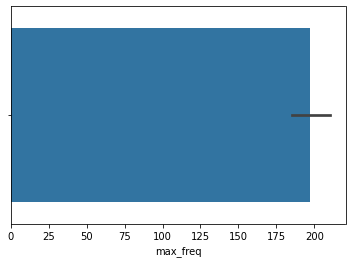

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


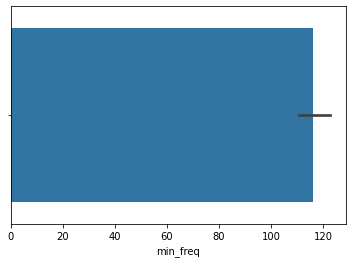

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


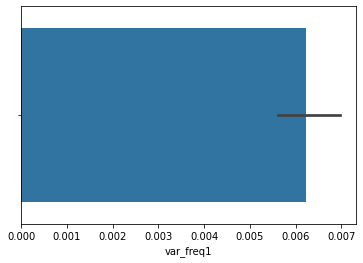

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


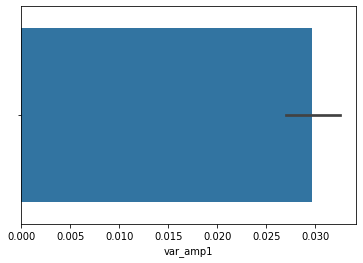

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


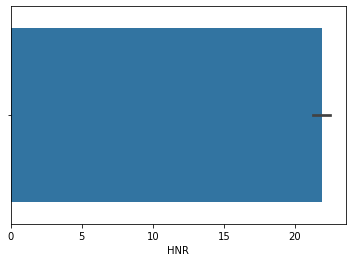

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


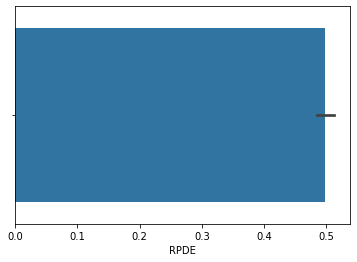

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


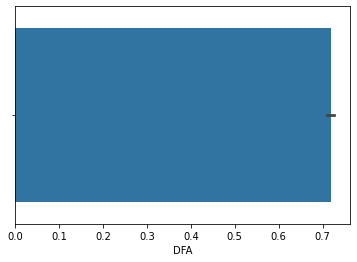

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


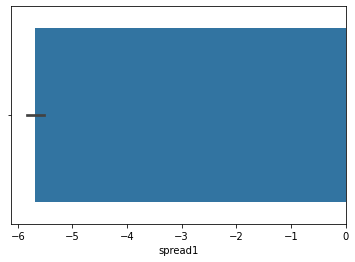

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


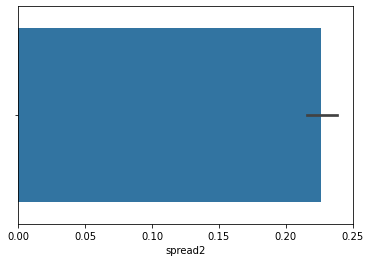

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


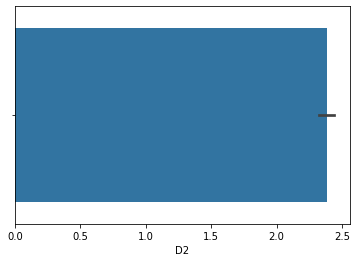

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


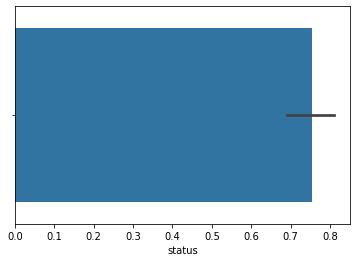

In [995]:
for i in park:
  sns.barplot(park[i])
  plt.show()

In [996]:
l=["avg_freq","max_freq","min_freq","HNR","spread1","D2"]
A=MinMaxScaler()
for i in l:
 park[i]=A.fit_transform(park[[i]])

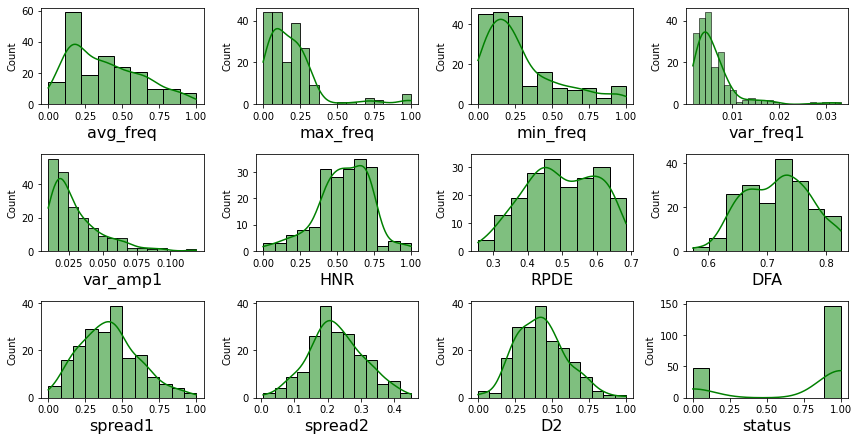

In [997]:
dist_plot(park)

## **Data Splitting**

In [998]:
x=park.drop(["status"],axis = 1)
x

,avg_freq,max_freq,min_freq,var_freq1,var_amp1,HNR,RPDE,DFA,spread1,spread2,D2
0,0.184308,0.112592,0.054815,0.00784,0.04374,0.511745,0.414783,0.815285,0.569875,0.266482,0.390661
1,0.198327,0.094930,0.278323,0.00968,0.06134,0.432577,0.458359,0.819521,0.703277,0.335590,0.473145
2,0.165039,0.059128,0.265288,0.01050,0.05233,0.496220,0.429895,0.825288,0.636745,0.311173,0.408819
3,0.165004,0.072927,0.264200,0.00997,0.05492,0.495936,0.434969,0.819235,0.695627,0.334147,0.436977
4,0.161150,0.080909,0.260107,0.01284,0.06425,0.455499,0.417356,0.823484,0.762472,0.234513,0.404336
...,...,...,...,...,...,...,...,...,...,...,...
190,0.499820,0.262986,0.165722,0.00459,0.04087,0.450134,0.448439,0.657899,0.257894,0.121952,0.549049
191,0.705488,0.307974,0.138243,0.00564,0.02751,0.435097,0.431674,0.683244,0.319956,0.129303,0.605474
192,0.502730,0.281413,0.050727,0.01360,0.02308,0.383728,0.407567,0.655683,0.212945,0.158453,0.558967
193,0.642893,0.601807,0.054279,0.00740,0.02296,0.429936,0.451221,0.643956,0.220650,0.207454,0.318222


In [999]:
y=park["status"]

In [1000]:
y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [1002]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)

In [1003]:
xtrain.shape

(156, 11)

In [1004]:
xtest.shape

(39, 11)

In [1005]:
ytrain.shape

(156,)

In [1006]:
ytest.shape

(39,)

# **Model Building**

**1.LogisticRegression**

In [1007]:
model1=LogisticRegression()


In [1008]:
model1.fit(xtrain,ytrain)

LogisticRegression()

In [1009]:
predict1=model1.predict(xtest)
predict1

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [1010]:
R1=accuracy_score(ytest,predict1)
print("Testing ACCURACY OF LOGISTIC REGRESSION =",round(R1*100,2),"%")

Testing ACCURACY OF LOGISTIC REGRESSION = 87.18 %


In [1011]:
predict11=model1.predict(xtrain)
predict11

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1])

In [1012]:
R11=accuracy_score(ytrain,predict11)
print("TRAIN ACCURACY OF LOGISTIC REGRESSION =",round(R11*100,2),"%")

TRAIN ACCURACY OF LOGISTIC REGRESSION = 85.9 %


**2.RandomForestClassifier**

In [1013]:
model2=RandomForestClassifier(n_estimators=90,criterion='entropy',n_jobs=1,verbose=50,random_state=70,ccp_alpha=0.01,class_weight='balanced')
model2.fit(xtrain,ytrain)
predict2=model2.predict(xtest)
predict2

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 90
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 90
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 90
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 90
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 90
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 90
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 90
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 90
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 90
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
b

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [1014]:
R2=accuracy_score(ytest,predict2)
print("TEST ACCURACY OF RANDOM FOREST=",round(R2*100,2),"%")

TEST ACCURACY OF RANDOM FOREST= 97.44 %


In [1015]:
predict22=model2.predict(xtrain)
predict22

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

In [1016]:
R22=accuracy_score(ytrain,predict22)
print("TRAIN ACCURACY OF RANDOM FOREST=",round(R22*100,2),"%")

TRAIN ACCURACY OF RANDOM FOREST= 100.0 %


 **3.Decision Tree**

In [1017]:
model3=DecisionTreeClassifier()
model3.fit(xtrain,ytrain)
predict3=model3.predict(xtest)
predict3


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [1018]:
R3=accuracy_score(ytest,predict3)
print("test accuracy=",round(R3*100,2),"%")

test accuracy= 89.74 %


In [1019]:
predict33=model3.predict(xtrain)
predict33

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

In [1020]:
R33=accuracy_score(ytrain,predict33)
print("test accuracy=",round(R33*100,2),"%")

test accuracy= 100.0 %


In [1021]:
C3=[model3]
F3=[]
T3=[]
for i in C3:
  i.fit(xtrain,ytrain)
  F3.append(round(accuracy_score(ytest,i.predict(xtest))*100,2))
  T3.append(round(accuracy_score(ytrain,i.predict(xtrain))*100,2))
print(F3)
print(T3) 

[92.31]
[100.0]


**4.ADA Booster**


In [1022]:
model4=AdaBoostClassifier()
model4.fit(xtrain,ytrain)
predict4=model4.predict(xtest)
predict4

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [1023]:
R4=accuracy_score(ytest,predict4)
print("test accuracy=",round(R4*100,2),"%")

test accuracy= 94.87 %


In [1024]:
predict44=model4.predict(xtrain)
predict44

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

In [1025]:
R44=accuracy_score(ytrain,predict44)
print("train_accuracy=",round(R44*100,2),"%")

train_accuracy= 100.0 %


**5.XGB**

In [1026]:
model5=XGBClassifier()
model5.fit(xtrain,ytrain)
predict5=model5.predict(xtest)
predict5

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [1027]:
R5=accuracy_score(ytest,predict5)
print("test_accuracy=",round(R5*100,2),"%")

test_accuracy= 94.87 %


In [1028]:
predict55=model5.predict(xtrain)
predict55

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1])

In [1029]:
R55=accuracy_score(ytrain,predict55)
print("train_accuracy=",round(R55*100,2),"%")

train_accuracy= 100.0 %


**6.KNN**

In [1030]:
model6=KNeighborsClassifier(n_neighbors=5)
model6.fit(xtrain,ytrain)
knn_y=model6.predict(xtest)
knn_y

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [1031]:
print(confusion_matrix(ytest,knn_y))
print('\n')
print(classification_report(ytest,knn_y))
knn_test_acc=accuracy_score(ytest,knn_y)
print("test_accuracy=",round(knn_test_acc*100,2),"%")

[[13  1]
 [ 2 23]]


              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.96      0.92      0.94        25

    accuracy                           0.92        39
   macro avg       0.91      0.92      0.92        39
weighted avg       0.93      0.92      0.92        39

test_accuracy= 92.31 %


In [1032]:
knn_train_acc=model6.score(xtrain,ytrain)
print("train_accuracy=",round(knn_train_acc*100,2),"%")

train_accuracy= 92.95 %


**7.SVM -SVC**

In [1033]:

model7= SVC(probability=True)
model7.fit(xtrain,ytrain)
p=model7.predict(xtest)
accuracy_score(ytest,p)

0.8974358974358975

In [1034]:
p1=model7.predict(xtrain)
accuracy_score(ytrain,p1)

0.8653846153846154

## **Performance Analysis of Each Model**




In [1035]:
C_NEW=[model1,model2,model3,model4,model5,model6,model7]
Testing_Acc=[]
Training_Acc=[]
for i in C_NEW:
  i.fit(xtrain,ytrain)
  Testing_Acc.append(round(accuracy_score(ytest,i.predict(xtest))*100,2))
  Training_Acc.append(round(accuracy_score(ytrain,i.predict(xtrain))*100,2))
print(Testing_Acc)
print(Training_Acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 90
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
building tree 2 of 90
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
building tree 3 of 90
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
building tree 4 of 90
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
building tree 5 of 90
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 6 of 90
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
building tree 7 of 90
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
building tree 8 of 90
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
building tree 9 of 90
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
b

In [1037]:
DATA_FRAME=pd.DataFrame({"MODEL_NAME":['LOGISTIC REGRESSION','RandomForest','DECISION TREE ALGORITHM','AdaBoostClassifier','XGBClassifier','KNN','SVC'],"training accuracy":Training_Acc,"testing accuracy":Testing_Acc})
DATA_FRAME

,MODEL_NAME,training accuracy,testing accuracy
0,LOGISTIC REGRESSION,85.90,87.18
1,RandomForest,100.00,97.44
2,DECISION TREE ALGORITHM,100.00,92.31
3,AdaBoostClassifier,100.00,94.87
4,XGBClassifier,100.00,94.87
5,KNN,92.95,92.31
6,SVC,86.54,89.74


In [1038]:
predp6=model6.predict_proba(xtest)

In [1039]:
fpr,tpr,threshold=roc_curve(ytest,predp6[:,1],pos_label=1)


## **Performance of KNN through ROC Curve**

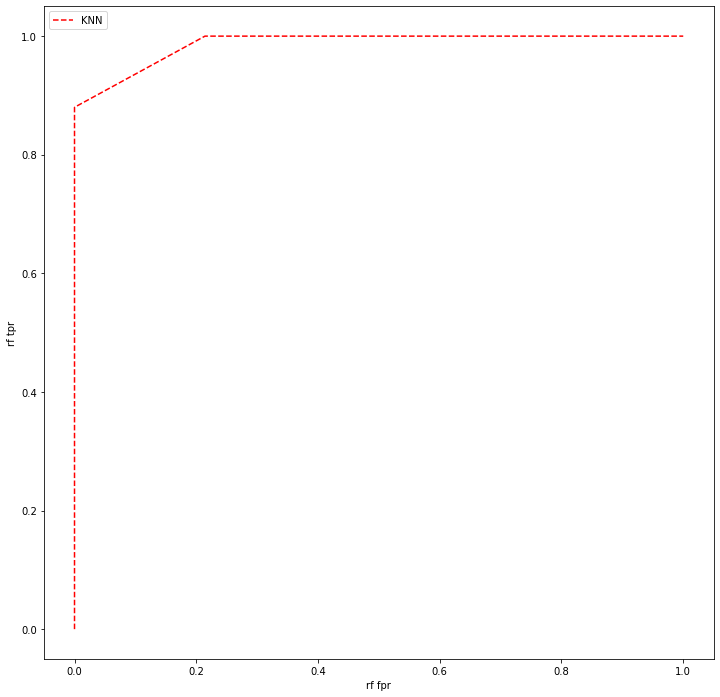

In [1040]:
plt.figure(figsize=(12,12))
plt.plot(fpr,tpr,"r--",label="KNN")
plt.xlabel("rf fpr")
plt.ylabel("rf tpr")
plt.legend(loc=2)
plt.show()

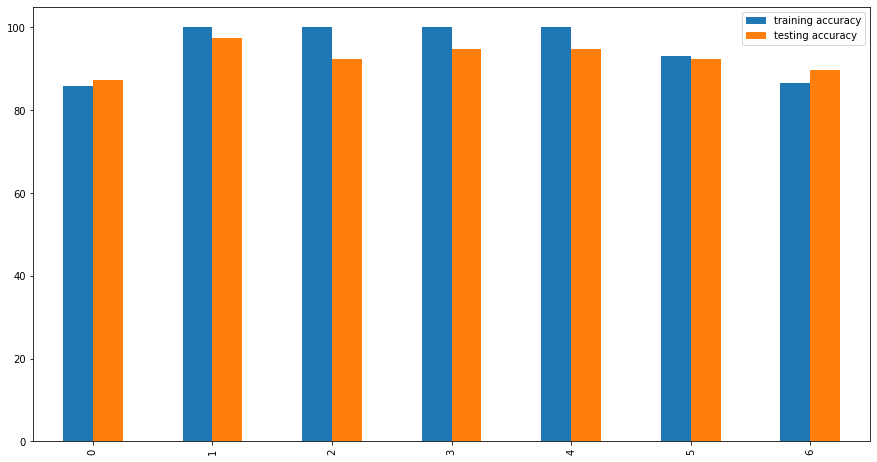

In [1041]:
DATA_FRAME.plot(kind='bar',figsize=(15,8))

## **Prediction Using Existing Data**

In [1042]:
Eva_data=[[0.184308,	0.112592,	0.054815,	0.00784,	0.04374,	0.511745,	0.414783,	0.815285,	0.569875,	0.266482,	0.390661		]]
p=model6.predict(Eva_data)
if p[0]==0:
  print("THE PATIENT HAS NO POSSIBILITY OF PARKINSON'S")
else:
  print("THE PATIENT HAS POSSIBILITY OF PARKIN'S,SO MUST CONSULT A DOCTOR")

THE PATIENT HAS POSSIBILITY OF PARKIN'S,SO MUST CONSULT A DOCTOR


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [1043]:
Eva_data=[[0.660416,	0.327754,	0.073416,	0.00694,	0.02574,	0.444079,	0.508479,	0.683761,	0.186317,	0.159890,	0.397292]]
p=model6.predict(Eva_data)
if p[0]==0:
  print("THE PATIENT HAS NO POSSIBILITY OF PARKINSON'S")
else:
  print("THE PATIENT HAS POSSIBILITY OF PARKIN'S,SO MUST CONSULT A DOCTOR")

THE PATIENT HAS NO POSSIBILITY OF PARKINSON'S


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
